Training Logistic Regression: Predicting patient survival after 5 years
Training Random Forest: Used as a comparison model for survival prediction
                 Model  Accuracy  F1 Score  AUC Score
0  Logistic Regression  0.972323  0.970348   0.993625
1        Random Forest  0.975331  0.973565   0.993941

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2600
           1       1.00      0.95      0.97      2386

    accuracy                           0.97      4986
   macro avg       0.97      0.97      0.97      4986
weighted avg       0.97      0.97      0.97      4986


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2600
           1       1.00      0.95      0.97      2386

    accuracy                           0.98      4986
   macro avg       0.98      0.97      0.98      4986
we

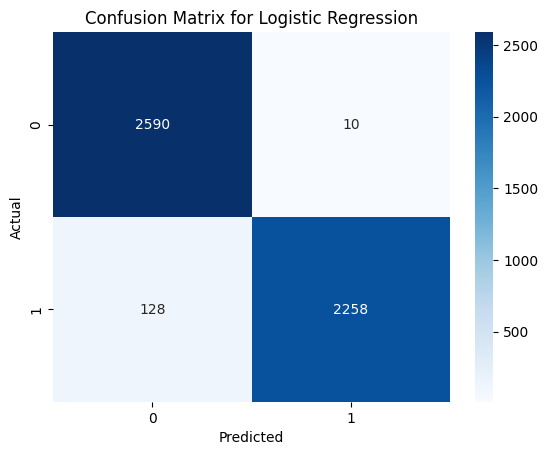

Confusion matrix for Random Forest:


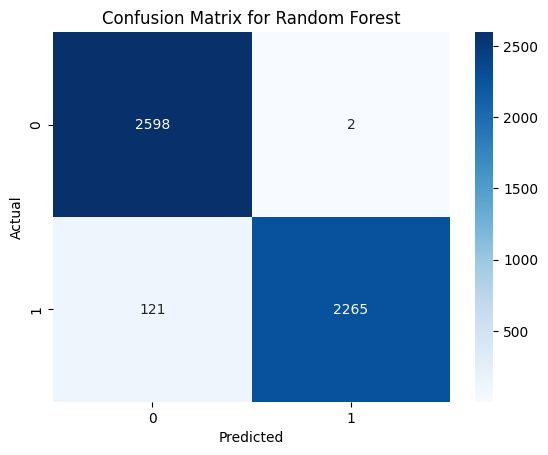

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load Dataset
df = pd.read_csv("cleaned_dataset.csv")

# Encode Categorical Features
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define Features and Target
X = df.drop(columns=["stutus_5_years"])
y = df["stutus_5_years"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression
print("Training Logistic Regression: Predicting patient survival after 5 years")
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Train Random Forest
print("Training Random Forest: Used as a comparison model for survival prediction")
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight="balanced")
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Models
models = ["Logistic Regression", "Random Forest"]
accuracy = [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)]
f1 = [f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_rf)]
auc = [roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])]

results = pd.DataFrame({"Model": models, "Accuracy": accuracy, "F1 Score": f1, "AUC Score": auc,})
print(results)

#Print classificaton report for both
from sklearn.metrics import classification_report

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

#Plot confusion matrix for both
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Plot confusion matrix for both algorithms
cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion matrix for Logistic Regression:")
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Confusion matrix for Random Forest:")
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Category Label Mappings:
Radiation recode: {0: 'Beam radiation', 1: 'Combination of beam with implants or isotopes', 2: 'Radioactive implants (includes brachytherapy) (1988+)', 3: 'Radioisotopes (1988+)', 4: 'Refused (1988+)', 5: nan}
Chemotherapy recode: {0: 'No', 1: 'Yes'}
Radiation sequence with surgery: {0: 'Intraoperative rad with other rad before/after surgery', 1: 'Intraoperative radiation', 2: 'No radiation and/or cancer-directed surgery', 3: 'Radiation after surgery', 4: 'Radiation before and after surgery', 5: 'Radiation prior to surgery', 6: 'Surgery both before and after radiation'}
ER Status Recode Breast Cancer (1990+): {0: 'Borderline', 1: 'Negative', 2: 'Positive'}
PR Status Recode Breast Cancer (1990+): {0: 'Borderline', 1: 'Negative', 2: 'Positive'}
Derived HER2 Recode (2010+): {0: 'Borderline', 1: 'Negative', 2: 'Positive'}
Race recode: {0: 'Black', 1: 'White'}
stutus_5_years: {0: 'Alive', 1: 'Dead'}
Training K-Nearest Neighbors: Used for recommending alternative tr

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


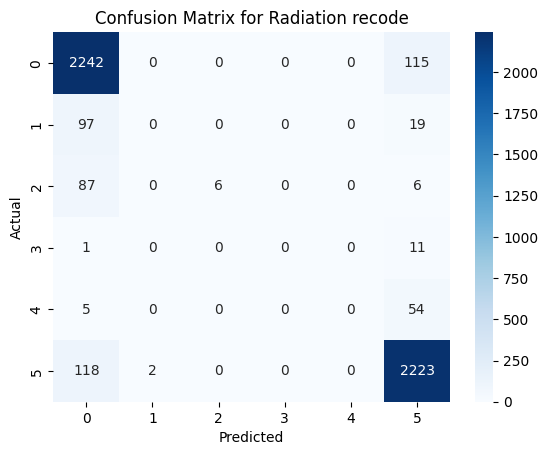

Accuracy for Chemotherapy recode: 0.802647412755716

Classification report for Chemotherapy recode:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2998
           1       0.78      0.71      0.74      1988

    accuracy                           0.80      4986
   macro avg       0.80      0.79      0.79      4986
weighted avg       0.80      0.80      0.80      4986

Plot confusion matrix for Chemotherapy recode:


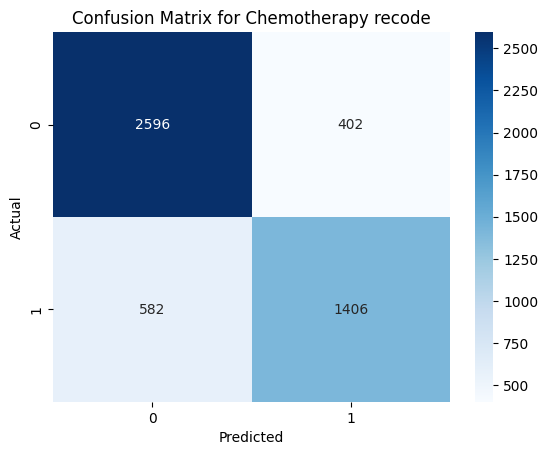

Accuracy for Radiation sequence with surgery: 0.9183714400320898

Classification report for Radiation sequence with surgery:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         8
           2       0.94      0.92      0.93      2778
           3       0.89      0.93      0.91      2177
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        15

    accuracy                           0.92      4986
   macro avg       0.31      0.31      0.31      4986
weighted avg       0.91      0.92      0.92      4986

Plot confusion matrix for Radiation sequence with surgery:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


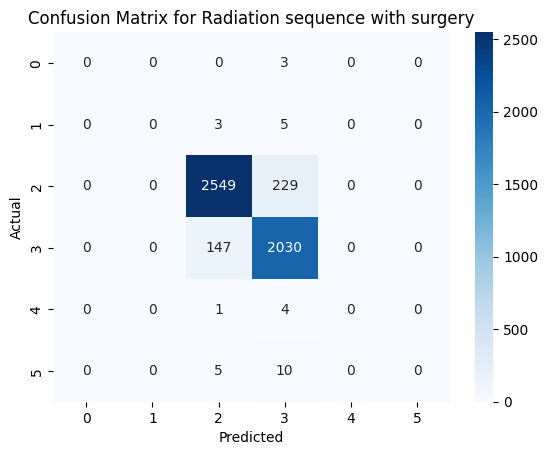

In [ ]:
#Alternative sequence prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("cleaned_dataset.csv")

# Encode Categorical Features
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display Label Mappings for Categorical Inputs
print("\nCategory Label Mappings:")
for col, le in label_encoders.items():
    print(f"{col}: {dict(enumerate(le.classes_))}")

# Define Features and Target
X = df.drop(columns=["stutus_5_years", "interva_years"])  # Excluding interval_year
y = df[["Radiation recode", "Chemotherapy recode", "Radiation sequence with surgery"]]  # Predicting treatment plan

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y["Radiation recode"])

# Train KNN (k=25)
print("Training K-Nearest Neighbors: Used for recommending alternative treatment plans")
knn_clf = KNeighborsClassifier(n_neighbors=25)
knn_clf.fit(X_train, y_train)

# Calculate accuracy and generate reports for each output separately
for i, col in enumerate(y.columns):
    y_pred = knn_clf.predict(X_test)[:, i]  # Predictions for the current column
    y_true = y_test.iloc[:, i]  # True values for the current column
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy for {col}: {accuracy}")

    # Generate and print classification report for the current output column
    print(f"\nClassification report for {col}:")
    print(classification_report(y_true, y_pred))  # Pass y_true and y_pred as 1D arrays

    # Generate and plot confusion matrix for the current output column
    print(f"Plot confusion matrix for {col}:")
    cm = confusion_matrix(y_true, y_pred)  # Pass y_true and y_pred as 1D arrays
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {col}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Category Label Mappings:
Radiation recode: {0: 'Beam radiation', 1: 'Combination of beam with implants or isotopes', 2: 'Radioactive implants (includes brachytherapy) (1988+)', 3: 'Radioisotopes (1988+)', 4: 'Refused (1988+)', 5: nan}
Chemotherapy recode: {0: 'No', 1: 'Yes'}
Radiation sequence with surgery: {0: 'Intraoperative rad with other rad before/after surgery', 1: 'Intraoperative radiation', 2: 'No radiation and/or cancer-directed surgery', 3: 'Radiation after surgery', 4: 'Radiation before and after surgery', 5: 'Radiation prior to surgery', 6: 'Surgery both before and after radiation'}
ER Status Recode Breast Cancer (1990+): {0: 'Borderline', 1: 'Negative', 2: 'Positive'}
PR Status Recode Breast Cancer (1990+): {0: 'Borderline', 1: 'Negative', 2: 'Positive'}
Derived HER2 Recode (2010+): {0: 'Borderline', 1: 'Negative', 2: 'Positive'}
Race recode: {0: 'Black', 1: 'White'}
stutus_5_years: {0: 'Alive', 1: 'Dead'}
Training K-Nearest Neighbors: Used for recommending alternative tr

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


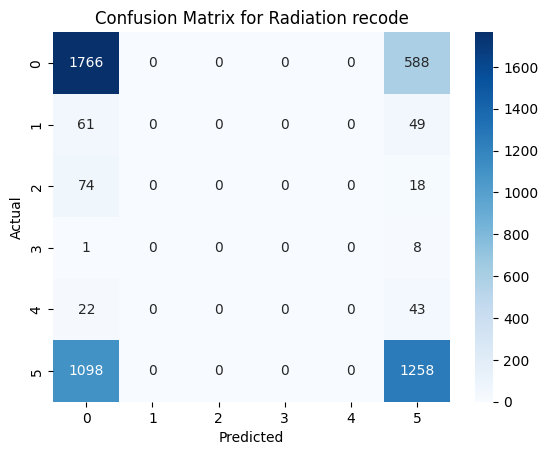

Accuracy for Chemotherapy recode: 0.7653429602888087

Classification report for Chemotherapy recode:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      2970
           1       0.76      0.61      0.68      2016

    accuracy                           0.77      4986
   macro avg       0.76      0.74      0.75      4986
weighted avg       0.77      0.77      0.76      4986

Confusion matrix


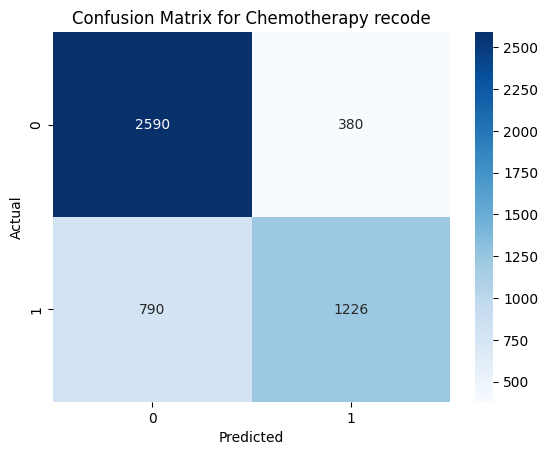

Accuracy for Radiation sequence with surgery: 0.661251504211793

Classification report for Radiation sequence with surgery:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        15
           2       0.71      0.67      0.69      2752
           3       0.61      0.66      0.64      2191
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00         1

    accuracy                           0.66      4986
   macro avg       0.19      0.19      0.19      4986
weighted avg       0.66      0.66      0.66      4986

Confusion matrix


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


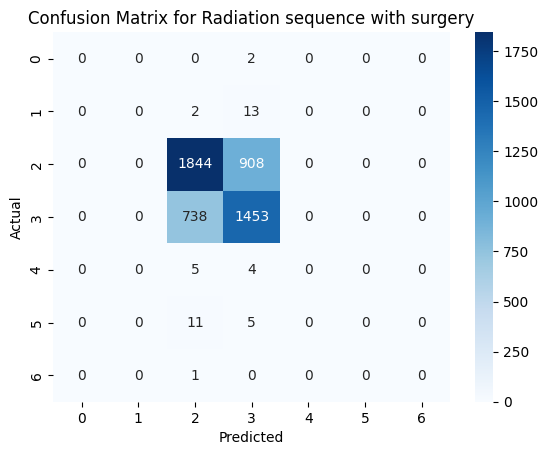

In [2]:
#Treatment prediction system
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score # Importing accuracy_score here
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("cleaned_dataset.csv")

# Encode Categorical Features
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display Label Mappings for Categorical Inputs
print("\nCategory Label Mappings:")
for col, le in label_encoders.items():
    print(f"{col}: {dict(enumerate(le.classes_))}")

# Define Features and Target
X = df.drop(columns=["stutus_5_years", "Radiation recode", "Chemotherapy recode", "Radiation sequence with surgery", "interva_years"]) # Excluding interval_year
y = df[["Radiation recode", "Chemotherapy recode", "Radiation sequence with surgery"]]  # Predicting future treatment
output_features = y.columns.tolist() # Define output_features based on target columns

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN (k=25)
print("Training K-Nearest Neighbors: Used for recommending alternative treatment plans")
knn_clf = KNeighborsClassifier(n_neighbors=20)
knn_clf.fit(X_train, y_train)

# Calculate accuracy for each output separately
for i, col in enumerate(y.columns):
    y_pred = knn_clf.predict(X_test)[:, i]  # Predictions for the current column
    y_true = y_test.iloc[:, i]  # True values for the current column
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy for {col}: {accuracy}")
    #Print classification report
    print(f"\nClassification report for {col}:")
    print(classification_report(y_true, y_pred))
    #Plot confusion matrix
    print("Confusion matrix")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {col}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
